## Импорт библиотек и загрузка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('abalone.csv')
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


## Описание данных

| Название признака                  | Тип данных    | Измерение           | Описание                                                    |
| ---------------------------------- | ------------- | ------------------- | ----------------------------------------------------------- |
| Пол (Sex)                          | номинальный   | M, F и I (младенец) | Пол особи                                                   |
| Длина (Length)                     | непрерывный   | мм                  | Наибольшая длина раковины                                   |
| Диаметр (Diameter)                 | непрерывный   | мм                  | Измерение, перпендикулярное длине                           |
| Высота (Height)                    | непрерывный   | мм                  | Высота с мясом внутри раковины                              |
| Общий вес (Whole weight)           | непрерывный   | граммы              | Вес целой абалоновой раковины                               |
| Вес мяса (Shucked weight)          | непрерывный   | граммы              | Вес мяса после извлечения                                   |
| Вес внутренностей (Viscera weight) | непрерывный   | граммы              | Вес внутренностей (после удаления крови)                    |
| Вес раковины (Shell weight)        | непрерывный   | граммы              | Вес раковины после высушивания                              |
| Кольца (Rings)                     | целочисленный | —                   | Количество колец; для получения возраста добавляют 1.5 года |

## Исследование данных

Размер датасета

In [4]:
df.shape

(4177, 9)

Информация о типах данных и пропусках. В описании данных говорилось что пропусков нет, но на слово мы не верим

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   object 
dtypes: float64(7), object(2)
memory usage: 293.8+ KB


Как видим пропусков действительно нет.

В данных единственный категориальный признак - пол, заменим его при помощи one hot encoding тк пол не имеет сравнимости.

In [6]:
dummies = pd.get_dummies(df["Sex"], prefix="Sex", dtype=int)
df_copy = pd.concat([df.drop(columns=["Sex"]), dummies], axis=1)

In [7]:
df_copy

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


Удали дубликаты строчек, если таковые имеются

In [8]:
df_copy.drop_duplicates(inplace=True)

In [9]:
len(df_copy)

4177

Оказалось нет таких

Проверим данные на ошибки типов

In [10]:
df_copy.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings              object
Sex_F               int32
Sex_I               int32
Sex_M               int32
dtype: object

Что-то не в порядке со столбцом Rings

In [11]:
df_copy['Rings'].unique()

array(['15', '7', '9', '10', '8', '20', '16', '19', '14', '11', '12',
       '18', '13', '8s', '5', '4', '6', '21', '17', '22', '1', '3', '26',
       '23', '29', '2', '27', '25', '24'], dtype=object)

In [12]:
len(df_copy[df_copy["Rings"]=='8s'])

1

В данные затесалась одна строчка с ошибкой. Скорее всего вместо 8s должно быть просто 8. Но не будем гадать и просто выкинем эту строчку из датасета, тк отсутствие 1 строки из 4 тыс нам картину не испортит.

In [13]:
df_copy = df_copy[df_copy["Rings"]!='8s']
print(len(df_copy))

4176


## Взаимозависимость в данных

Учитывая количество данных типа "Вес" есть ощущение что будут неплохо скоррелированные признаки

### 1. Корреляция

In [14]:
df_copy.head()



,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


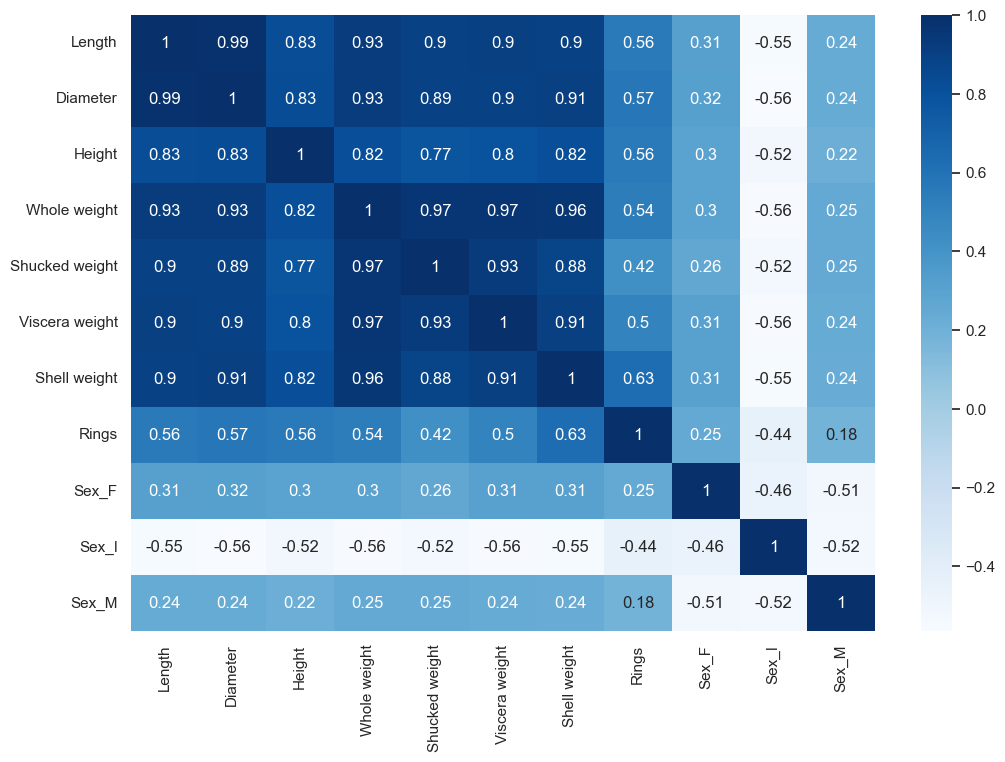

In [15]:
corr = df_copy.corr() # матрица корреляций
sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

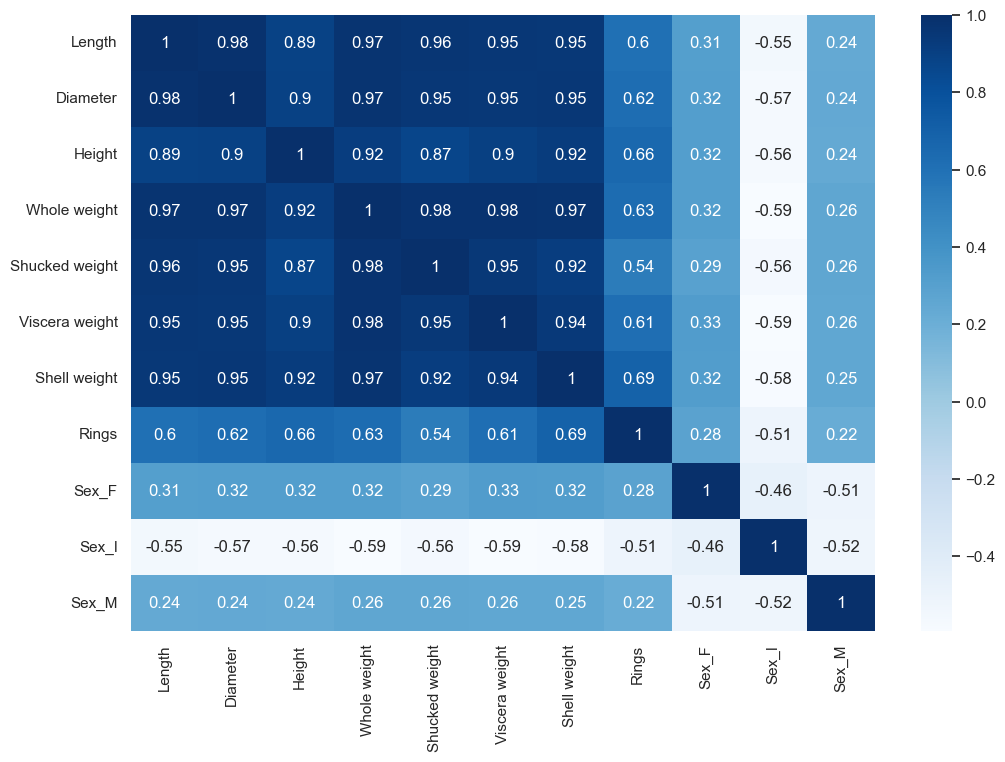

In [16]:
corr = df_copy.corr(method='spearman')

sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

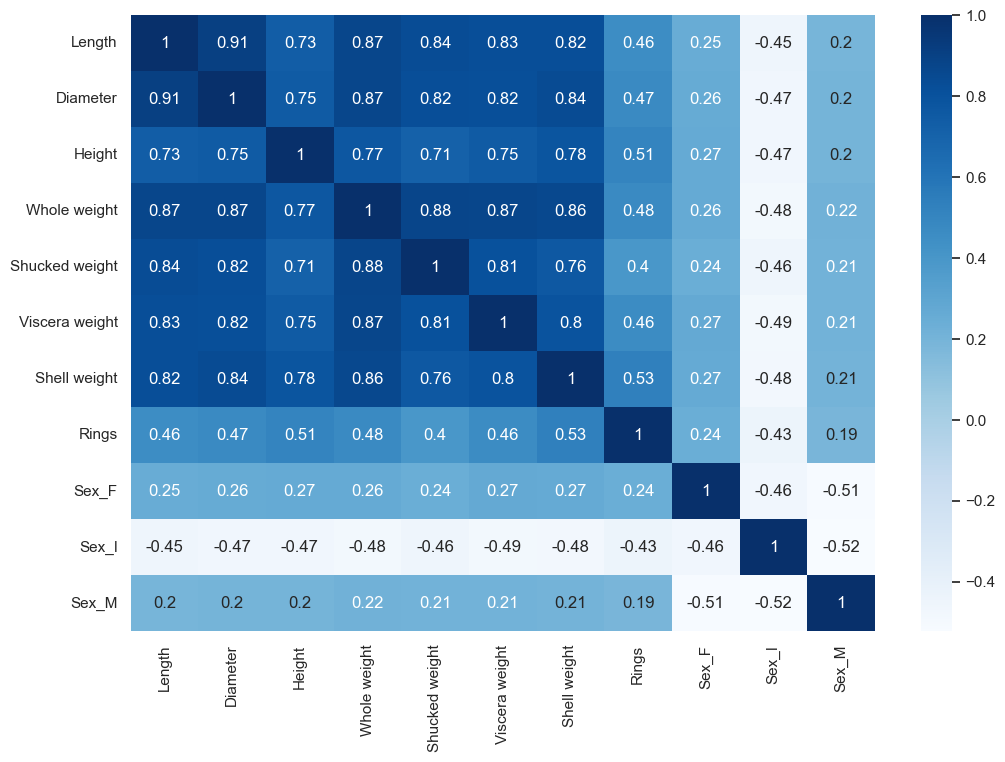

In [17]:
corr = df_copy.corr(method='kendall')

sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

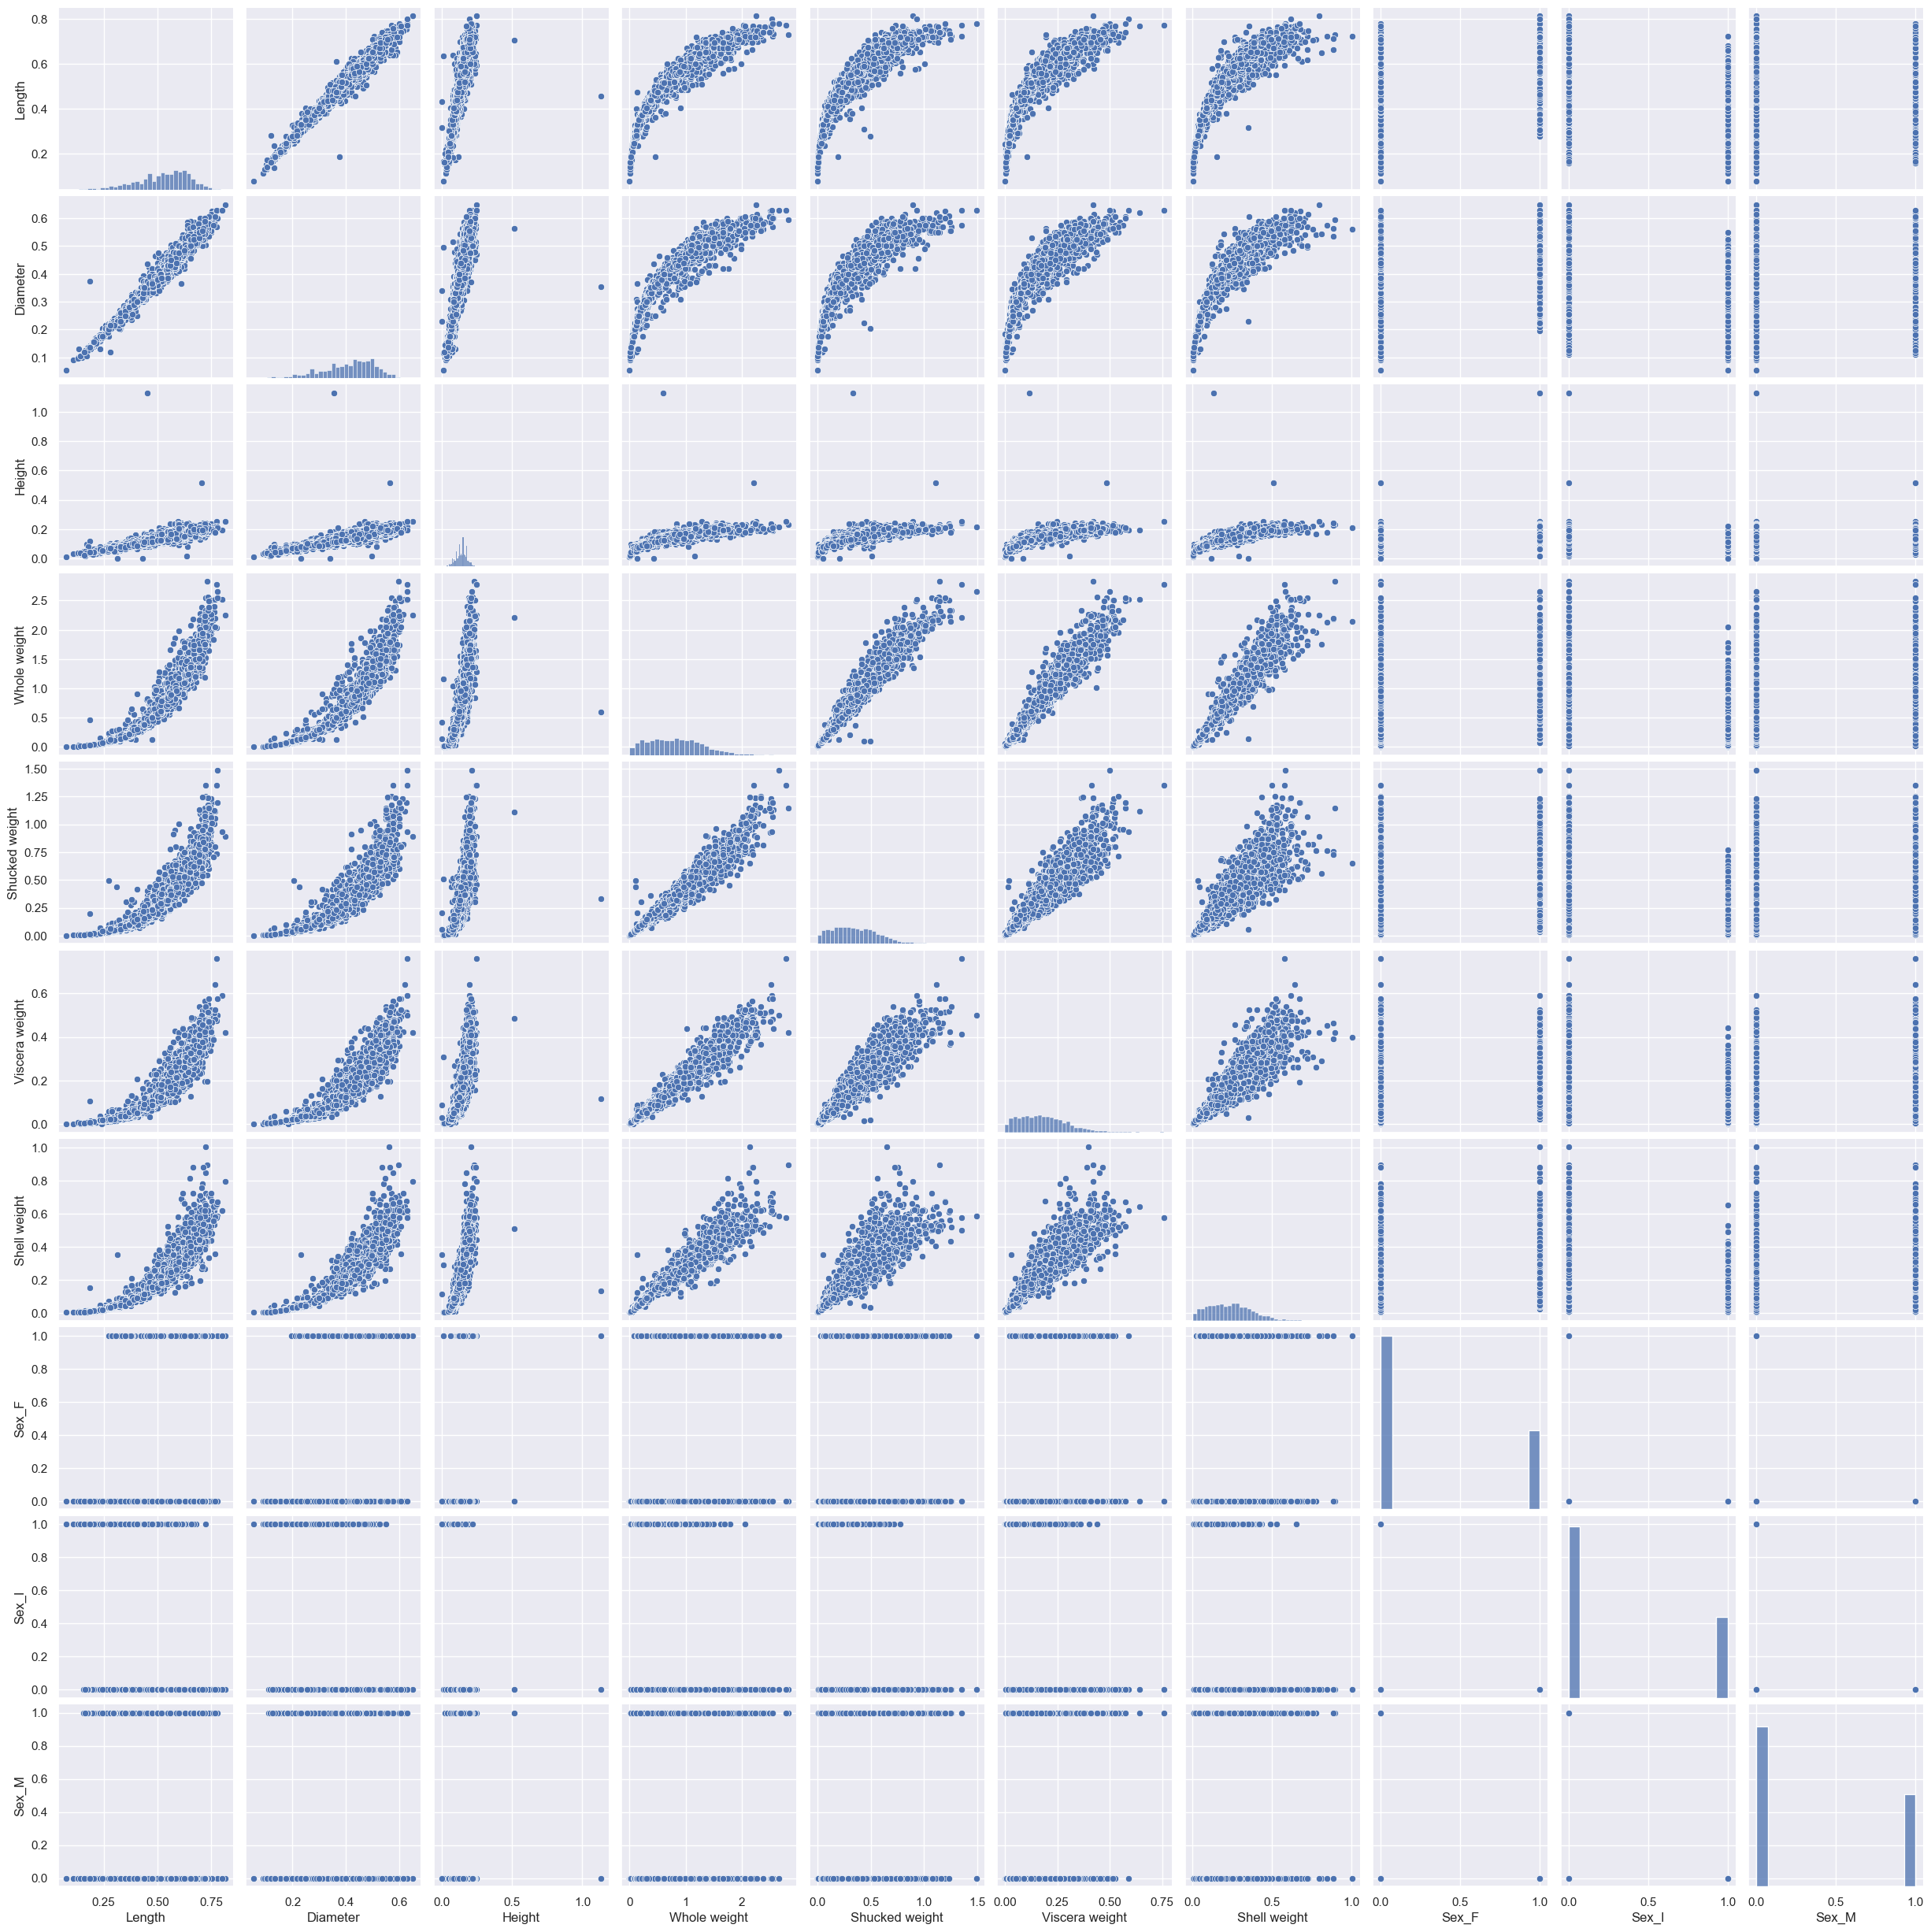

In [18]:
sns.pairplot(df_copy)

По pairplot можно увидеть следующее:
Пары (length; diametr), (length; height) и (height; diametr) линейно зависимы. При этом более менее гомоскедастичны
Пары (length; Whole weight), (length; Shucked weight), (Viscera; Whole weight), (length; Shell weight) имеют нелинейную зависимость. Логика подсказывает что она должна быть кубической в силу того, что масса кубически зависит от размера объекта(по одному измерению). Проверим это

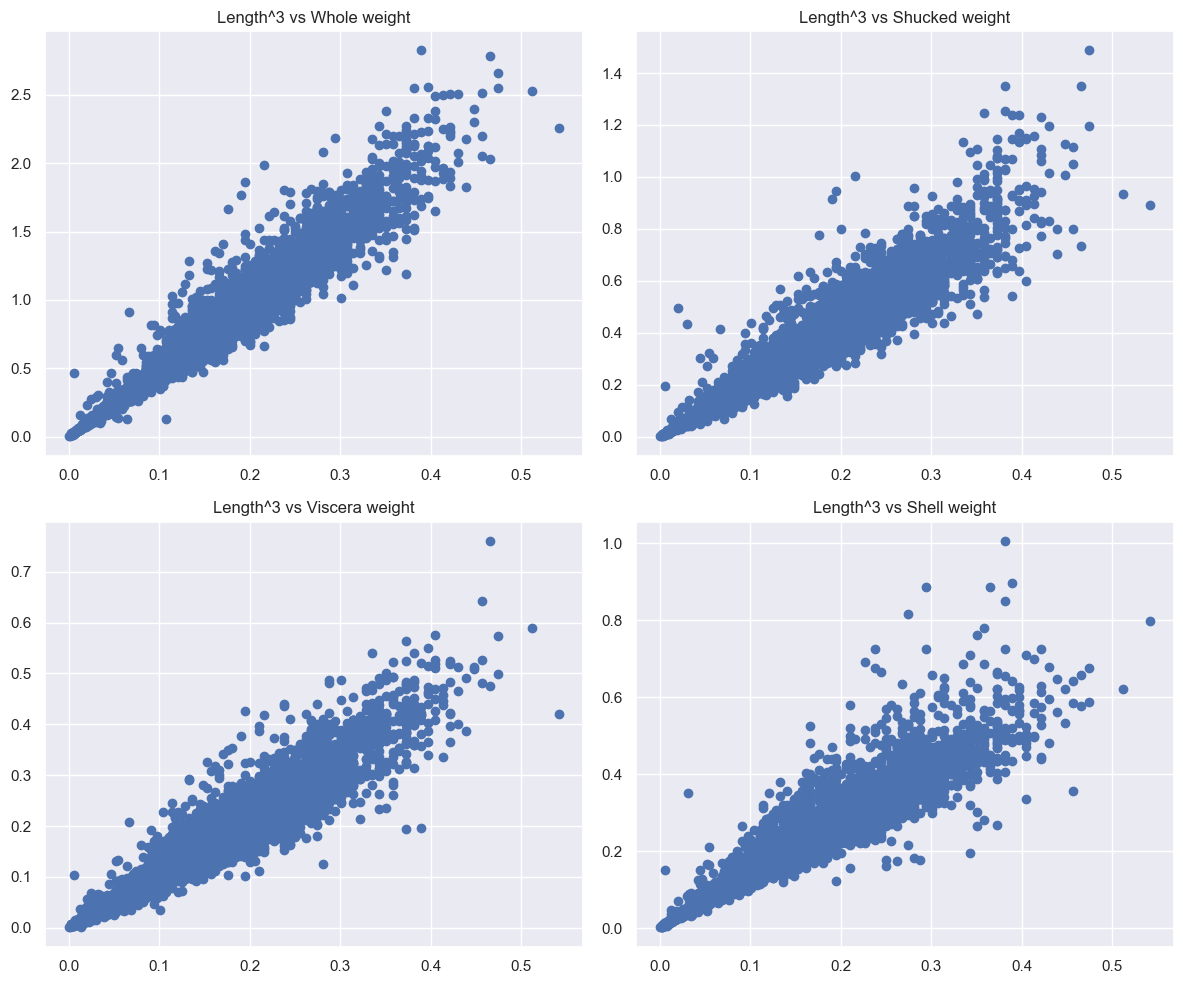

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

x = np.linspace(0, 10, 100)
axes[0, 0].scatter(df_copy['Length']**3, df_copy['Whole weight'])
axes[0, 0].set_title('Length^3 vs Whole weight')
axes[0, 0].grid(True)

axes[0, 1].scatter(df_copy['Length']**3, df_copy['Shucked weight'])
axes[0, 1].set_title('Length^3 vs Shucked weight')

axes[1, 0].scatter(df_copy['Length']**3, df_copy['Viscera weight'])
axes[1, 0].set_title('Length^3 vs Viscera weight')

axes[1, 1].scatter(df_copy['Length']**3, df_copy['Shell weight'])
axes[1, 1].set_title('Length^3 vs Shell weight')

plt.tight_layout()
plt.show()

Предположение оправдвалось, действительно есть линейная зависимость между кубом длины и весом

Рассмотрим также распределение данных между полами 

In [20]:
print(
f"""M - {len(df_copy[df_copy['Sex_M']==1])}
F - {len(df_copy[df_copy['Sex_F']==1])}
I - {len(df_copy[df_copy['Sex_I']==1])}""")

M - 1528
F - 1306
I - 1342


Между полами в датасете есть достаточно неплохой баланс, что вселяет надежды о достаточном количестве информации.

# Задача

По описанию задачи целевая переменная - Rings. Т.е. решаем задачу регрессии тк кольца показывают возраст.

# Выбор модели и оценка важности фич

Для сравнения возьмём обычную линейную регрессию и градиентный бустинг

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

X = df_copy.drop(columns=["Rings"])
y = df_copy["Rings"]                

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
LR = LinearRegression()
LR.fit(X_scaled, y)

feature_importance = np.abs(LR.coef_)  
feature_names = X.columns.tolist()    

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

importance_df

,feature,importance
3,Whole weight,4.401015
4,Shucked weight,4.391541
6,Shell weight,1.216720
5,Viscera weight,1.159903
1,Diameter,1.099599
2,Height,0.449837
8,Sex_I,0.268510
9,Sex_M,0.148353
7,Sex_F,0.116337
0,Length,0.055566


In [23]:
from sklearn.inspection import permutation_importance

res = permutation_importance(LR, X_scaled, y, n_repeats=10, n_jobs=-1, random_state=35)

In [24]:
res_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': res.importances_mean,
    'importance_std': res.importances_std
}).sort_values('importance_mean', ascending=False)

print(res_importance_df)

          feature  importance_mean  importance_std
3    Whole weight         3.702269        0.050614
4  Shucked weight         3.683151        0.043917
6    Shell weight         0.284228        0.005457
5  Viscera weight         0.256798        0.005291
1        Diameter         0.231769        0.004634
2          Height         0.039285        0.002089
8           Sex_I         0.014232        0.001638
9           Sex_M         0.004369        0.000769
7           Sex_F         0.002608        0.000735
0          Length         0.000588        0.000147


In [25]:
GB = GradientBoostingRegressor()
GB.fit(X_scaled, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': GB.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
6,Shell weight,0.675984
4,Shucked weight,0.172302
2,Height,0.039509
3,Whole weight,0.037961
8,Sex_I,0.023978
1,Diameter,0.018892
5,Viscera weight,0.017776
0,Length,0.011917
7,Sex_F,0.001477
9,Sex_M,0.000205


In [26]:
from sklearn.inspection import permutation_importance

res = permutation_importance(GB, X_scaled, y, n_repeats=10, n_jobs=-1, random_state=35)

In [27]:
res_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': res.importances_mean,
    'importance_std': res.importances_std
}).sort_values('importance_mean', ascending=False)

print(res_importance_df)

          feature  importance_mean  importance_std
4  Shucked weight         1.631360        0.020262
6    Shell weight         0.888076        0.013300
3    Whole weight         0.437407        0.010991
2          Height         0.065570        0.002105
1        Diameter         0.034877        0.002784
8           Sex_I         0.028457        0.001613
5  Viscera weight         0.026705        0.001447
0          Length         0.016890        0.001955
7           Sex_F         0.001108        0.000167
9           Sex_M         0.000125        0.000041


Сравнение показало что обе модели главным образом цепляются за вес. 

Линейная регрессия ставит во главу угла Whole weight и Shucked weight

Градиентный бустинг же считает более важными Shucked weight и Shell weight

Интересно что обе модели посчитали Shucked weight важным параметром

Теперь перейдем к обучению моделей и проверке

# Обучение

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# На всех данных

Обучение LinearRegression...


C:\Users\k_dys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


LinearRegression: R² CV=0.5492, Test R²=0.5698, MAPE=0.1481
Обучение GradientBoosting...


C:\Users\k_dys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GradientBoosting: R² CV=0.5354, Test R²=0.5878, MAPE=0.1475


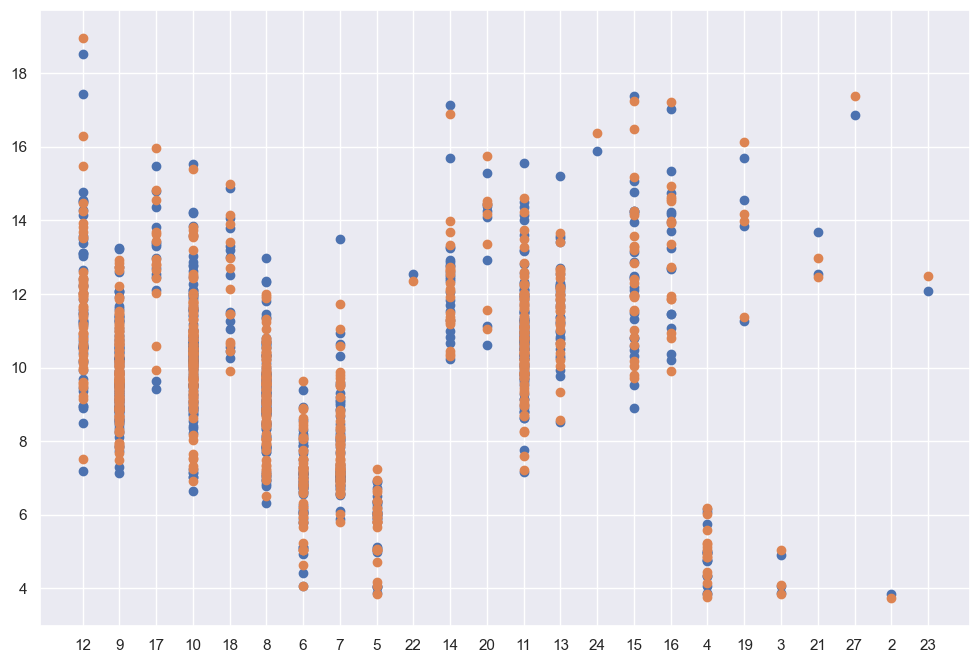

In [36]:
X = df_copy.drop(columns=["Rings"])
y = df_copy["Rings"]                

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_params = {
    'LinearRegression': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [75, 100, 125, 150],
            'max_depth': [10, 15, 20],
            'max_leaf_nodes': [150, 300, 450]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [75, 100, 125, 150],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1]
        }
    }
}

results = {}
metrics = []

for name, config in models_params.items():
    print(f"Обучение {name}...")
    gs = GridSearchCV(
        config['model'], config['params'], 
        cv=cv, scoring='r2', n_jobs=-1
    )
    gs.fit(X_train, y_train)
    results[name] = gs
    
    # Предсказания
    y_pred = gs.predict(X_test)
    
    # Метрики
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics.append({
        'Model': name,
        'Best_R2_CV': gs.best_score_,
        'Test_R2': r2,
        'Test_MAPE': mape
    })
    plt.scatter(y_test,y_pred)
    print(f"{name}: R² CV={gs.best_score_:.4f}, Test R²={r2:.4f}, MAPE={mape:.4f}")


# Обучение на топ 4 по permutation importance

Обучение LinearRegression...


C:\Users\k_dys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


LinearRegression: R² CV=0.5365, Test R²=0.5546, MAPE=0.1529
Обучение GradientBoosting...


C:\Users\k_dys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GradientBoosting: R² CV=0.5275, Test R²=0.5686, MAPE=0.1529


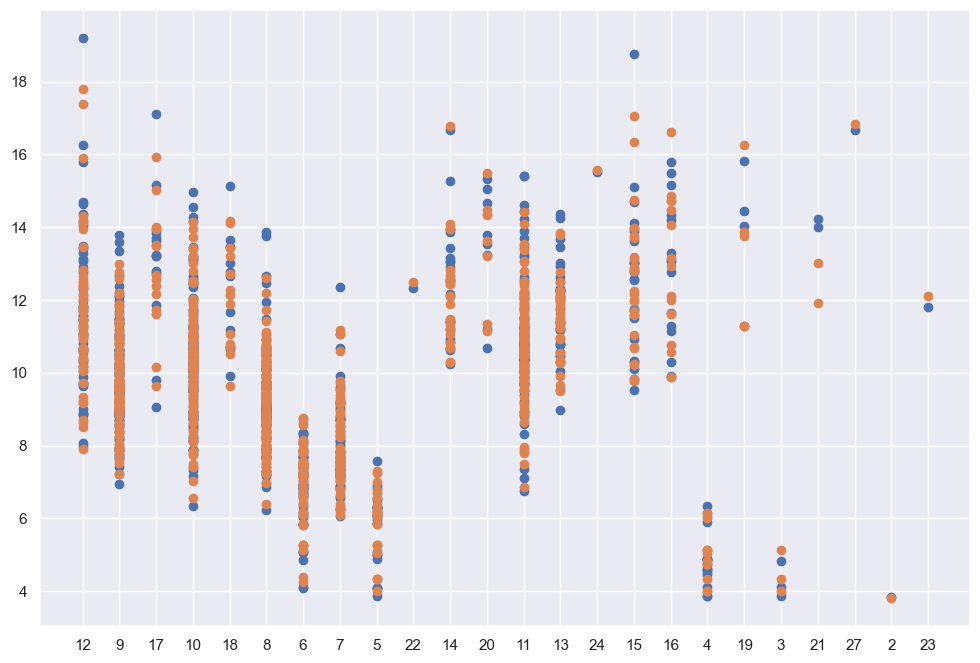

In [37]:

X = df_copy.drop(columns=["Rings"])[['Shucked weight', 'Shell weight', 'Whole weight','Height']]
y = df_copy["Rings"]                

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_params = {
    'LinearRegression': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [75, 100, 125, 150],
            'max_depth': [10, 15, 20],
            'max_leaf_nodes': [150, 300, 450]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [75, 100, 125, 150],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1]
        }
    }
}

results = {}
metrics = []

for name, config in models_params.items():
    print(f"Обучение {name}...")
    gs = GridSearchCV(
        config['model'], config['params'], 
        cv=cv, scoring='r2', n_jobs=-1
    )
    gs.fit(X_train, y_train)
    results[name] = gs
    
    # Предсказания
    y_pred = gs.predict(X_test)
    
    # Метрики
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics.append({
        'Model': name,
        'Best_R2_CV': gs.best_score_,
        'Test_R2': r2,
        'Test_MAPE': mape
    })
    plt.scatter(y_test,y_pred)
    print(f"{name}: R² CV={gs.best_score_:.4f}, Test R²={r2:.4f}, MAPE={mape:.4f}")


В обоих случаях модели показывают +- одинаковый результат с ошибкой порядка 15%